In [1]:
%matplotlib notebook
import math, random
from operator import itemgetter
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

<IPython.core.display.Javascript object>


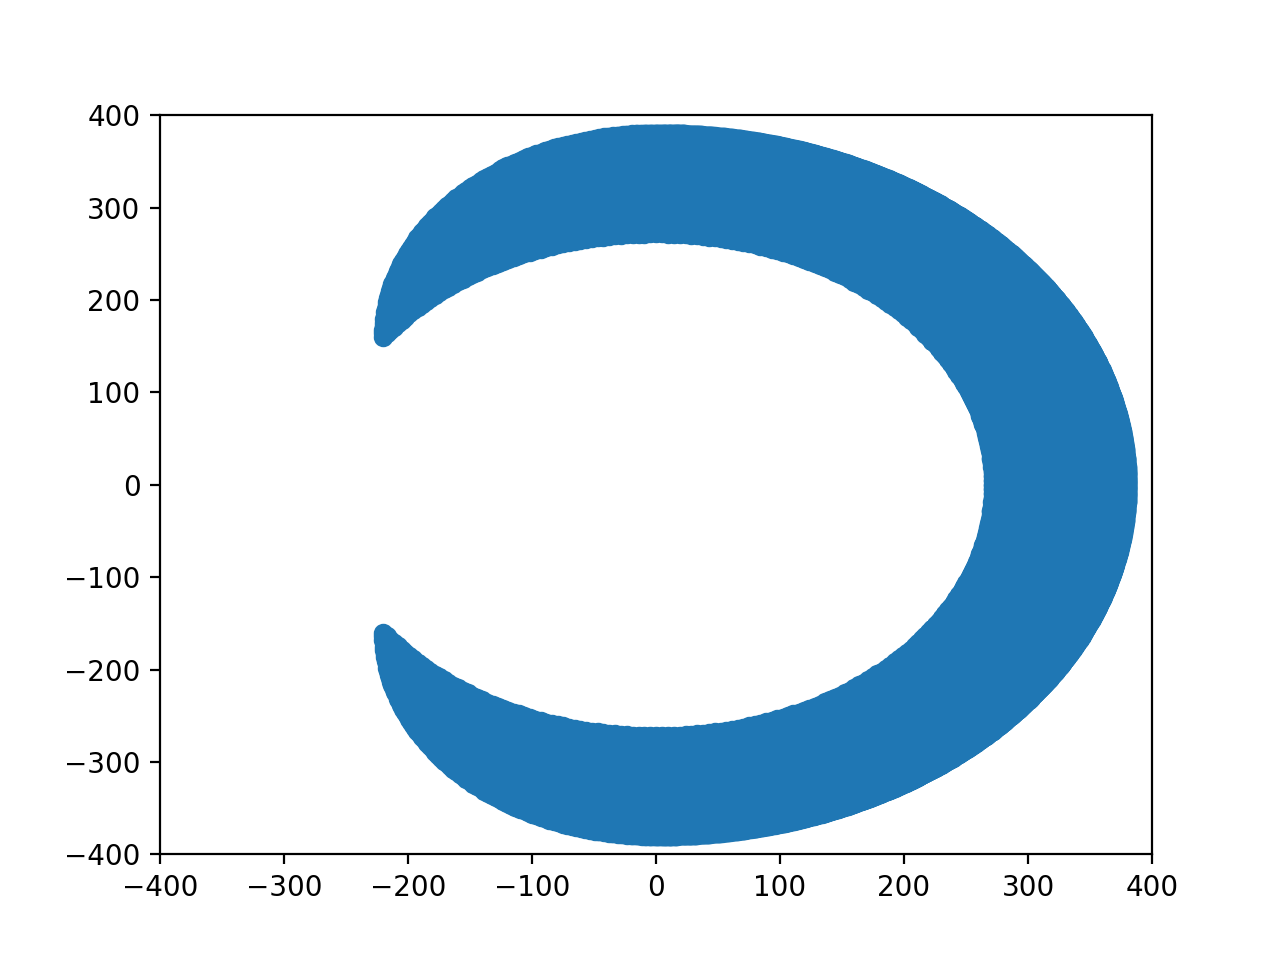

(-400, 400)

In [28]:
x_max = 90
x_min = -90

y_max = 90
y_min = -90

x_inc = 1 #degree
y_inc = 1 #degree

l1 = 160
l2 = 220

x_cnt = x_min
pairs = []
while (x_cnt <= x_max):
    y_cnt = y_min
    while (y_cnt <= y_max):
        pair = (x_cnt, y_cnt)
        pairs.append(pair)
        y_cnt += y_inc
    x_cnt += x_inc

def getPosition(pair):
    angle_x = pair[0] / 180.0 * math.pi
    angle_y = pair[1] / 180.0 * math.pi
    x = l1 * math.cos(angle_x) + l2 * math.cos(angle_x + angle_y)
    y = l1 * math.sin(angle_x) + l2 * math.sin(angle_x + angle_y)
    # pos_pair = (int(x), int(y))
    pos_pair = (x, y)
    # print (pair, pos_pair)
    return (pos_pair)

x_pos = []
y_pos = []
for i in pairs:
    res = getPosition(i)
    x_pos.append(res[0])
    y_pos.append(res[1])
pen_fig = plt.figure()
ax1 = pen_fig.add_subplot(111)
ax1.scatter(x_pos, y_pos)
ax1.set_xlim(xmin=-400, xmax=400)
ax1.set_ylim(ymin=-400, ymax=400)

<IPython.core.display.Javascript object>


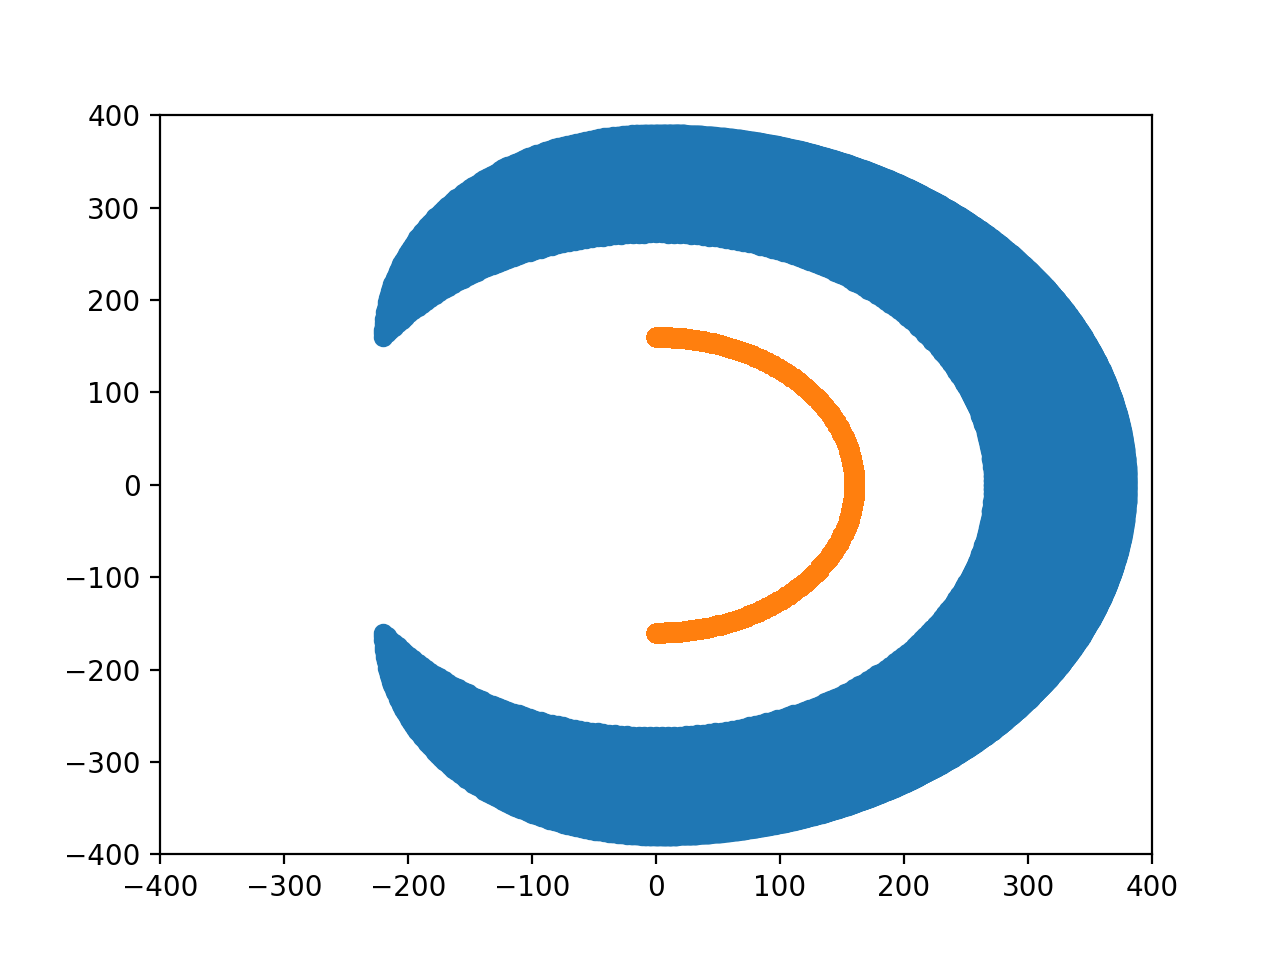

(-400, 400)

In [29]:
def getNeckPosition(pair):
    angle_x = pair[0] / 180.0 * math.pi
    angle_y = pair[1] / 180.0 * math.pi
    x = l1 * math.cos(angle_x)
    y = l1 * math.sin(angle_x)
    return (x, y)

x_zero, y_zero = [], []
for i in pairs:
    res = getNeckPosition(i)
    x_zero.append(res[0])
    y_zero.append(res[1])
neck_fig = plt.figure()
ax2 = neck_fig.add_subplot(111)
ax2.scatter(x_pos, y_pos)
ax2.scatter(x_zero, y_zero)
ax2.set_xlim(xmin=-400, xmax=400)
ax2.set_ylim(ymin=-400, ymax=400)

<IPython.core.display.Javascript object>


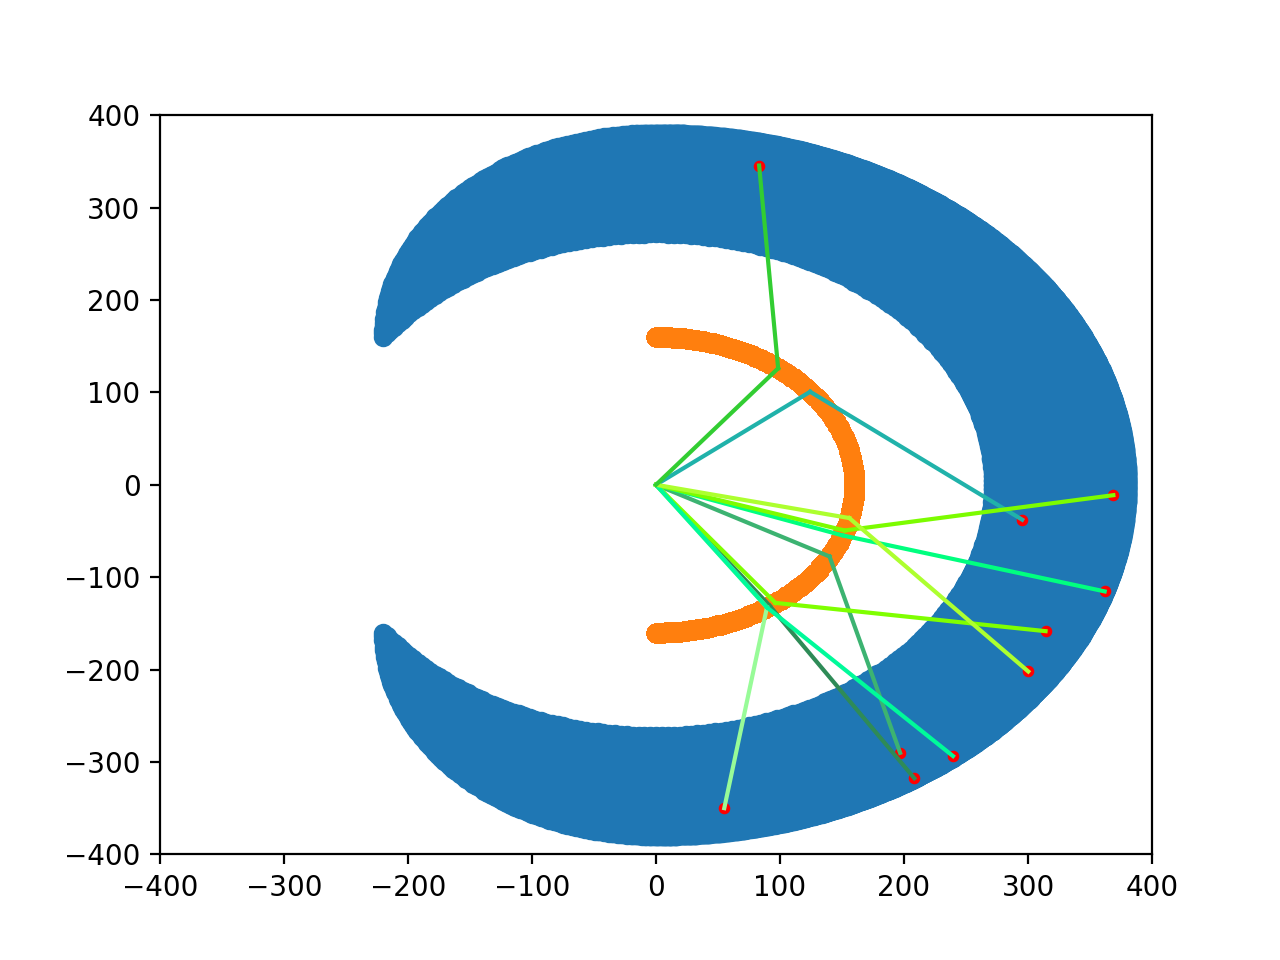

(-400, 400)

In [30]:
random.seed()
rand_pnts = []

joint_fig = plt.figure()
ax3 = joint_fig.add_subplot(111)
ax3.scatter(x_pos, y_pos)
ax3.scatter(x_zero, y_zero)

rand_cnt = 0
while (rand_cnt < 10):
    j = random.randint(0, len(pairs) - 1)
    if (x_pos[j] >= 0):
        rand_pnts.append(j)
        rand_cnt += 1

c = ["#2e8b57", "#3cb371", "#20b2aa", "#98fb98", "#00ff7f", "#7cfc00", "#7fff00", "#00fa9a", "#adff2f", "#32cd32"]
j = 0

x_pnt, y_pnt = [], []
for i in rand_pnts:
    x_pnt.append(x_pos[i])
    y_pnt.append(y_pos[i])
    ax3.plot([x_pos[i], x_zero[i]], [y_pos[i], y_zero[i]], c=c[j])
    ax3.plot([x_zero[i], 0], [y_zero[i], 0], c=c[j])
    ax3.plot(x_pos[i], y_pos[i], c='k')
    j += 1

ax3.scatter(x_pnt, y_pnt, s=10, color='r')
ax3.set_xlim(xmin=-400, xmax=400)
ax3.set_ylim(ymin=-400, ymax=400)

<IPython.core.display.Javascript object>


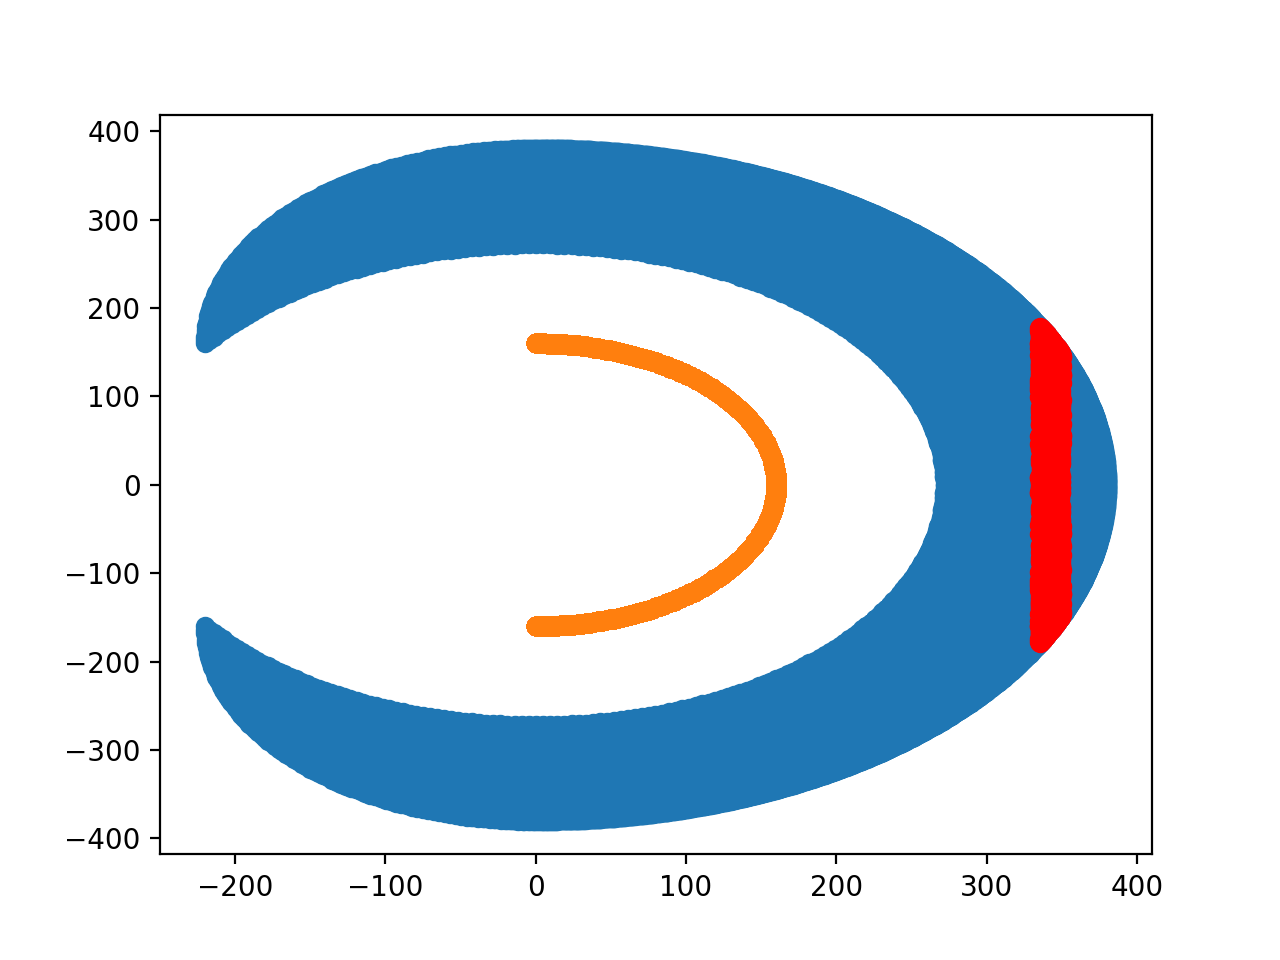

In [31]:
myrange = 5
new_x, new_y = [], []
for i in range(len(y_pos)):
    if (x_pos[i] >= 335) and (x_pos[i] <= 350):
        new_x.append(x_pos[i])
        new_y.append(y_pos[i])
res_fig = plt.figure()
ax4 = res_fig.add_subplot(111)
ax4.scatter(x_pos, y_pos)
ax4.scatter(x_zero, y_zero)
ax4.scatter(new_x, new_y, color='r')


<IPython.core.display.Javascript object>


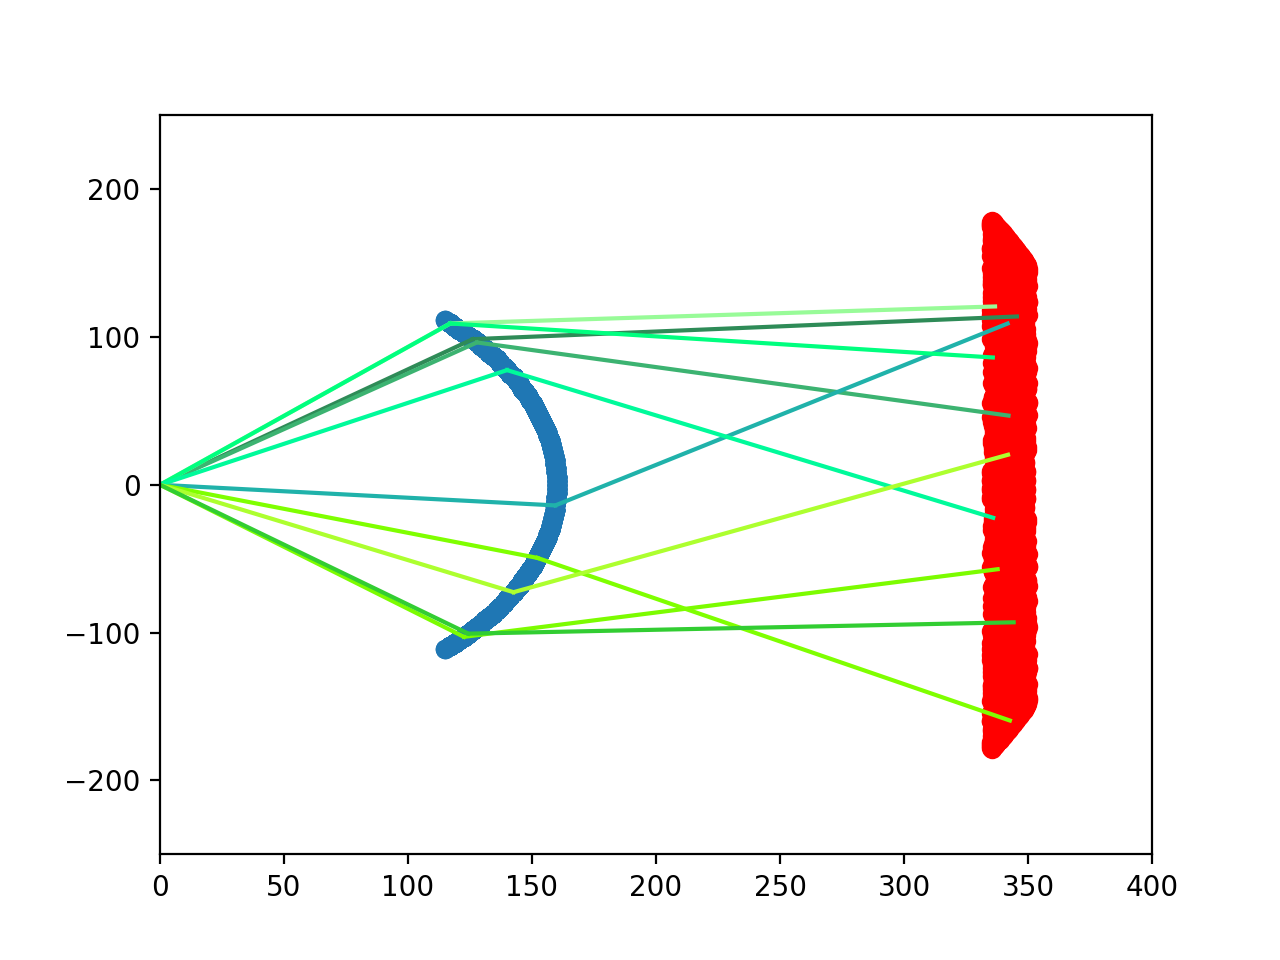

(-250, 250)

In [32]:
myrange = 5
new_x, new_y = [], []
new_x_z, new_y_z = [], []
a_pnt = []
for i in range(len(y_pos)):
    if (x_pos[i] >= 335) and (x_pos[i] <= 350):
        a_pnt.append(pairs[i])
        new_x.append(x_pos[i])
        new_x_z.append(x_zero[i])
        new_y.append(y_pos[i])
        new_y_z.append(y_zero[i])
        
res_fig = plt.figure()
ax5 = res_fig.add_subplot(111)
ax5.scatter(new_x_z, new_y_z)
ax5.scatter(new_x, new_y, color='r')
        
rand_cnt = 0
rand_pnts = []
while (rand_cnt < 10):
    j = random.randint(0, len(new_x_z) - 1)
    if (new_x[j] >= 0):
        rand_pnts.append(j)
        rand_cnt += 1

j = 0

x_pnt, y_pnt = [], []
for i in rand_pnts:
    x_pnt.append(x_pos[i])
    y_pnt.append(y_pos[i])
    ax5.plot([new_x[i], new_x_z[i]], [new_y[i], new_y_z[i]], c=c[j])
    ax5.plot([new_x_z[i], 0], [new_y_z[i], 0], c=c[j])
    ax5.plot(x_pos[i], y_pos[i], c='k')
    j += 1
ax5.set_xlim(xmin=0, xmax=400)
ax5.set_ylim(ymin=-250, ymax=250)

<IPython.core.display.Javascript object>


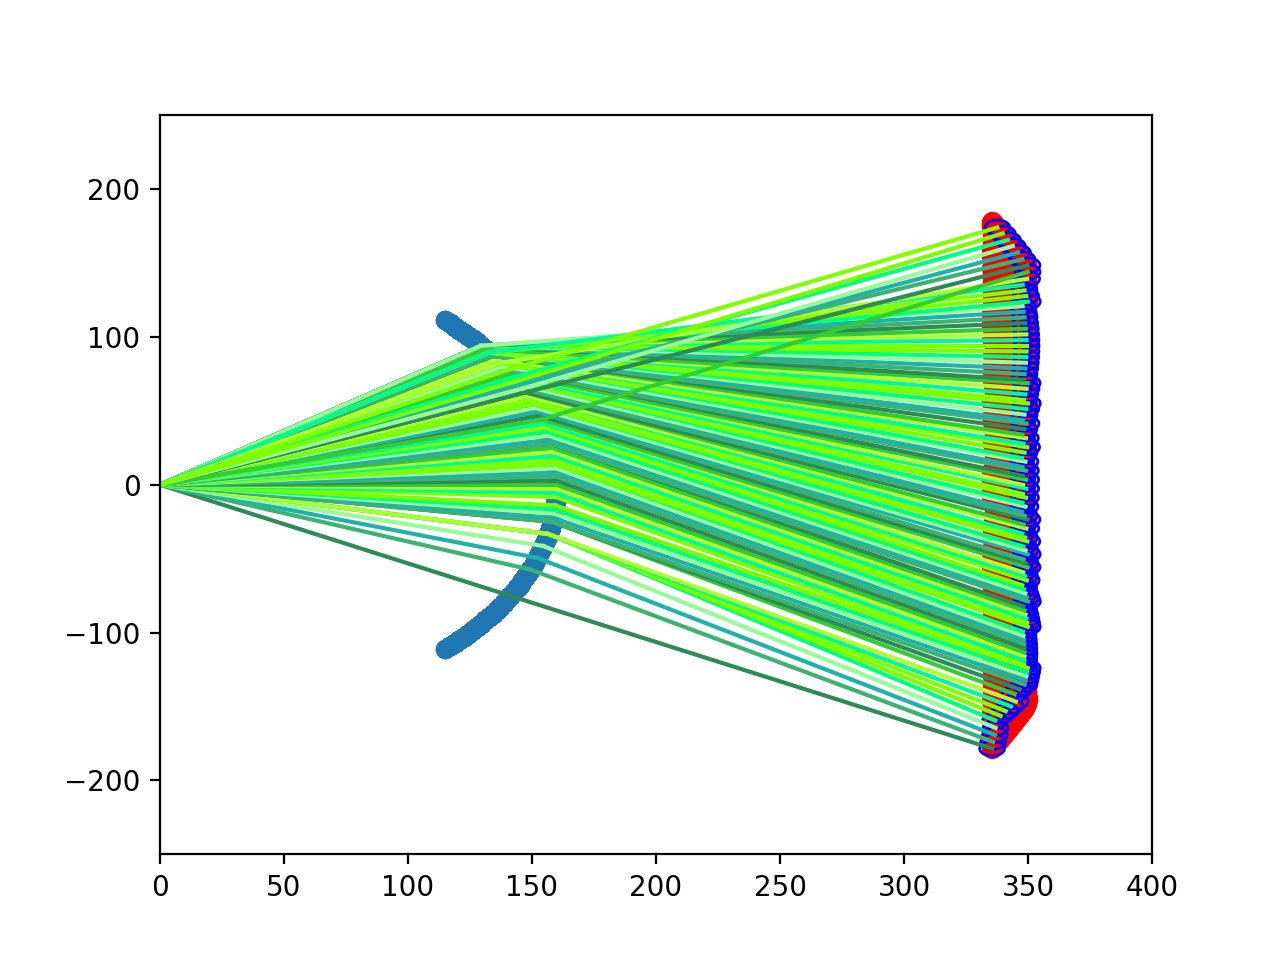

(-250, 250)

In [33]:
res_fig_2 = plt.figure()
ax6 = res_fig_2.add_subplot(111)
ax6.scatter(new_x_z, new_y_z)
ax6.scatter(new_x, new_y, color='r')

mov_pnts = zip(new_x, new_y, a_pnt)
mov_pnts.sort(key=lambda x: x[1])

A = mov_pnts[0]; B = mov_pnts[-1]

def CableDist(a1, a2):
    angle_a_delta = a1[2][0] - a2[2][0]
    angle_b_delta = a1[2][1] - a2[2][1]
    
    return (math.pow(angle_a_delta, 2) + math.pow(angle_b_delta, 2))

def CartSpace(a1, a2):
    x_delta = a1[0] - a2[0]
    y_delta = a1[1] - a2[1]
    
    return (math.pow(x_delta, 2) + math.pow(y_delta, 2))

def Locality(a, r, space, trajectory):
    local_pnt = []
    for e in space:
        if (e in trajectory):
            continue
        if (CartSpace(e, a) <= math.pow(r, 2)):
            local_pnt.append(e)
    return (local_pnt)

k = 1
r = 5
cur_pnt = A
eps = 10
pass_pnts = []
f = open('points.txt', 'w')
for i in range(1000):
    cur_val = CartSpace(B, cur_pnt) + (k * CableDist(B, cur_pnt))
    if (cur_val < eps):
        break;
    f.write("%f %f\n"%(cur_pnt[2]))
    pass_pnts.append(cur_pnt)
    circle = plt.Circle((cur_pnt[0], cur_pnt[1]), r, color='b', fill=False)
    x_p, y_p = getNeckPosition(cur_pnt[2])
    ax6.plot([0, x_p], [0, y_p], c=c[i % 10])
    ax6.plot([x_p, cur_pnt[0]], [y_p, cur_pnt[1]], c=c[i % 10])
    loc = Locality(cur_pnt, r, mov_pnts, pass_pnts)
    if not (loc):
        break
    loc_min = 0; min_val = CartSpace(B, loc[loc_min]) + (k * CableDist(B, loc[loc_min]))
    for j in range(1, len(loc)):
        val = (CartSpace(B, loc[j]) + (k * CableDist(B, loc[j])))
        if (val < min_val):
            min_val = val
            loc_min = j
    cur_pnt = loc[loc_min]
    ax6.add_patch(circle)
f.close()
ax6.set_xlim(xmin=0, xmax=400)
ax6.set_ylim(ymin=-250, ymax=250)



In [34]:
import sys
import math
import fileinput

data_cnt = 0

dataIn = open("points.txt", "r")
dataOut = open("grbl.gcode", "w")
angles = []
for line in dataIn:
    line = line[0:-2]
    vals = line.split(' ')
    angles.append((float(vals[0]), float(vals[1])))
dataIn.close()
dataOut.write("G0 X0 Y0 Z0\n")
for i in angles:
    x = round(i[0])
    y = round(i[1]) + x
    z = x + y
    dataOut.write("G0 X%d Y%d Z%d\n" % (int(x), int(y), int(z)))
dataOut.write("G0 X0 Y0 Z0\n")
dataOut.close()
